# Classification - Random Forest

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#import all the initial packages

from sklearn import linear_model as lm
import pandas as pd
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

In [3]:
#import csv file

Credit_data = pd.read_excel("Creditcard.xls")
Credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# checking the type of data

type(Credit_data)

pandas.core.frame.DataFrame

In [5]:
#checking the count

Credit_data.count()


ID                            30000
LIMIT_BAL                     30000
SEX                           30000
EDUCATION                     30000
MARRIAGE                      30000
AGE                           30000
PAY_0                         30000
PAY_2                         30000
PAY_3                         30000
PAY_4                         30000
PAY_5                         30000
PAY_6                         30000
BILL_AMT1                     30000
BILL_AMT2                     30000
BILL_AMT3                     30000
BILL_AMT4                     30000
BILL_AMT5                     30000
BILL_AMT6                     30000
PAY_AMT1                      30000
PAY_AMT2                      30000
PAY_AMT3                      30000
PAY_AMT4                      30000
PAY_AMT5                      30000
PAY_AMT6                      30000
default payment next month    30000
dtype: int64

In [6]:
# To count the summ of all null values in given datasets

Credit_data.count().isnull().sum()  #No missing values

0

In [7]:
#Seeing the shape of the dataframe

Credit_data.shape
Credit_data.head()

(30000, 25)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
#To rename the last coulmn name to simplfy its label

Credit_data = Credit_data.rename(columns = {'default payment next month' : 'Default'})
Credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
# Remove the first varaible as this is ID

Credit_data = Credit_data.drop('ID', 1)
Credit_data.shape

(30000, 24)

In [10]:
#frequency distribution of Default var

Credit_data.groupby("Default").size()

Default
0    23364
1     6636
dtype: int64

In [11]:
# import StandardScaler from sklearn.preprocessing to Normalize data

from sklearn.preprocessing import StandardScaler



In [12]:
# Scaling or applying Normalozation

# Initialise the Scaler 
scaler = StandardScaler() 
  
# To scale data 
scld_credit_data = scaler.fit_transform(Credit_data.drop("Default",1))


C:\Users\shara\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\shara\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [13]:
#converting standardized data to dataframe

type(scld_credit_data)
scld_credit_data = pd.DataFrame(scld_credit_data)

numpy.ndarray

In [14]:
# joining back the response varaible Default

scld_credit_data['Default'] = Credit_data['Default']
scld_credit_data.Default = scld_credit_data.Default.astype('category')
scld_credit_data.Default.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [15]:
# viewing the data after all transormations

type(scld_credit_data)
scld_credit_data.shape
scld_credit_data.head()
scld_credit_data.Default.dtype

pandas.core.frame.DataFrame

(30000, 24)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,Default
0,-1.136720,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,-0.597202,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,-0.905498,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0


CategoricalDtype(categories=[0, 1], ordered=False)

In [16]:
# Define Independent(x) and Dependent (y)  varaibles from the above dataset
x = scld_credit_data.iloc[:,:-1]
y = np.array(scld_credit_data ["Default"])

In [17]:
#Import train_test_split from sklearn model selection to split the data inot train ansd test.
# We have to use STRATIFY parameter and assign it to response varaible as this split is used for classification

from sklearn.model_selection import train_test_split    # Spilt the Data

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, 
                                                    random_state= 100, 
                                                    stratify = y)



In [18]:
len(x_train)
len(y_train)

24000

24000

In [19]:
# impprt RandomForestClassifier from sklearn.ensemble

from sklearn.ensemble import RandomForestClassifier


In [20]:
# Create model object for KNeighborsRegressor and choosed n_neighbors as 5

RF_cla = RandomForestClassifier()


In [21]:
#fit the model

RF_cla.fit(x_train,y_train)

C:\Users\shara\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
# Predict the values by passing the test data

RF_pred_val = RF_cla.predict(x_test)

In [23]:
# To see Model Accuracy
# Below assignment of TP, FP, FN and TN are applicable only when we have binary class clasification
# For multi class classification this is not applicable

from sklearn.metrics import confusion_matrix , accuracy_score , cohen_kappa_score 


Acc = accuracy_score(y_test, RF_pred_val)
kappa = cohen_kappa_score(y_test,RF_pred_val)
cm = confusion_matrix(y_test, RF_pred_val, labels=[0,1])
TP = cm[0][0] 
FP = cm[0][1] 
FN = cm[1][0] 
TN = cm[1][1] 
precision = TP/(TP+FP)
recall = TP/(TP+FN) 
F1 = 2 * (precision * recall) / (precision + recall)
 


In [24]:
# Printing all the scores from confusion matrix

print('Confusion Matrix is :' , cm)
print('Accuracy is:', Acc) 
print('Kappa is :', kappa)
print('Total Positve is:', TP)
print('Total Negative is:', TN)
print('False Positive is:', FP)
print('False Negative is:', FN)
print('Precision is:',precision)
print('Recall is:',recall)
print ('F1 score is:', F1)

Confusion Matrix is : [[4440  233]
 [ 908  419]]
Accuracy is: 0.8098333333333333
Kappa is : 0.3250911511425144
Total Positve is: 4440
Total Negative is: 419
False Positive is: 233
False Negative is: 908
Precision is: 0.9501390969398673
Recall is: 0.8302169035153328
F1 score is: 0.8861391078734657


Text(0.5, 15.0, 'Predicted labels')

Text(33.0, 0.5, 'True labels')

Text(0.5, 1.0, 'Confusion Matrix')

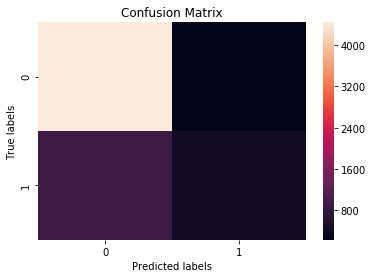

In [25]:
import seaborn as sns

ax= plt.subplot()
#sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
sns.heatmap(cm)
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 